In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data2.csv")

In [3]:
all_df[:4]

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,Respiratory.1,Circulatory.2,Diabetes.2,Digestive.2,Genitourinary.2,Injury.2,Muscoloskeletal.2,Neoplasms.2,Others.2,Respiratory.2
0,10,3,59,0,18,0,0,0,9,0,...,0,0,0,0,0,0,0,0,1,0
1,20,2,11,5,13,2,0,1,6,0,...,0,0,0,0,0,0,0,0,1,0
2,30,2,44,1,16,0,0,0,7,0,...,0,1,0,0,0,0,0,0,0,0
3,40,1,51,0,8,0,0,0,5,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
all_df.shape

(98052, 71)

In [5]:
X=all_df.drop(['readmitted'], axis=1).values.astype('float64')

In [6]:
Y = all_df['readmitted'].values.astype('int64')

In [7]:
X.shape

(98052, 70)

In [8]:
Y[:5]

array([1, 0, 0, 0, 1])

In [9]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78441

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [11]:
model = Sequential()

In [12]:
model.add(Dense(units=140*9,   input_dim=70,
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=140*8,
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=140*7,
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=140*6,
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=140*5,
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=140*4,
                kernel_initializer='uniform', 
                activation='relu'))

In [18]:
model.add(Dense(units=140*3,
                kernel_initializer='uniform', 
                activation='relu'))

In [19]:
model.add(Dense(units=140*2,
                kernel_initializer='uniform', 
                activation='relu'))

In [20]:
model.add(Dense(units=140,
                kernel_initializer='uniform', 
                activation='relu'))

In [21]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1260)              89460     
_________________________________________________________________
dense_2 (Dense)              (None, 1120)              1412320   
_________________________________________________________________
dense_3 (Dense)              (None, 980)               1098580   
_________________________________________________________________
dense_4 (Dense)              (None, 840)               824040    
_________________________________________________________________
dense_5 (Dense)              (None, 700)               588700    
_________________________________________________________________
dense_6 (Dense)              (None, 560)               392560    
_________________________________________________________________
dense_7 (Dense)              (None, 420)               235620    
__________

In [23]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [24]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 70596 samples, validate on 7845 samples
Epoch 1/30
70596/70596 [==============================] - 90s 1ms/step - loss: 0.6693 - acc: 0.5840 - val_loss: 0.6536 - val_acc: 0.6140
Epoch 2/30
70596/70596 [==============================] - 70s 985us/step - loss: 0.6483 - acc: 0.6256 - val_loss: 0.6495 - val_acc: 0.6176
Epoch 3/30
70596/70596 [==============================] - 70s 992us/step - loss: 0.6429 - acc: 0.6309 - val_loss: 0.6534 - val_acc: 0.6163
Epoch 4/30
70596/70596 [==============================] - 80s 1ms/step - loss: 0.6397 - acc: 0.6343 - val_loss: 0.6546 - val_acc: 0.6157


In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

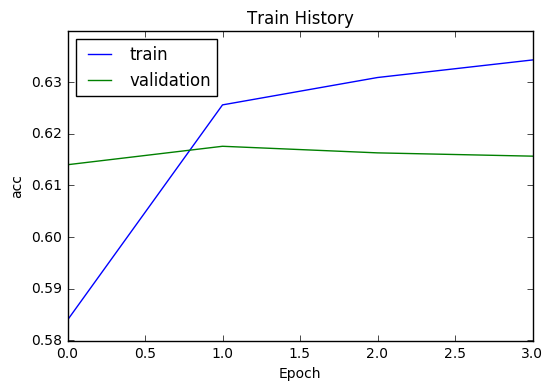

In [26]:
show_train_history(train_history,'acc','val_acc')

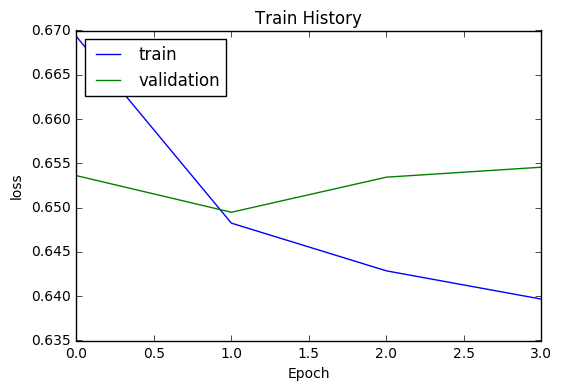

In [27]:
show_train_history(train_history,'loss','val_loss')

In [28]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19611/19611 [==============================] - 11s 561us/step


In [29]:
scores[1]

0.6191423180715913